In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_app_train = pd.read_csv('../data/application_train.csv')
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_app_train.shape

(307511, 122)

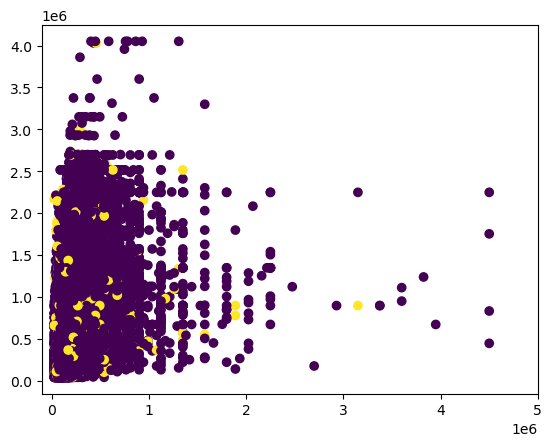

In [4]:
plt.scatter(x=df_app_train['AMT_INCOME_TOTAL'], y=df_app_train['AMT_CREDIT'], c=df_app_train['TARGET'])
plt.xlim(-100000, 5000000)
plt.show()

In [5]:
df_target_0 = df_app_train[df_app_train["TARGET"] == 0]

In [6]:
pd.crosstab(df_app_train["TARGET"], df_app_train["CODE_GENDER"], margins=True, normalize="columns")

CODE_GENDER,F,M,XNA,All
TARGET,,,,
0,0.930007,0.898581,1.0,0.919271
1,0.069993,0.101419,0.0,0.080729


In [7]:
pd.crosstab(df_app_train["TARGET"], df_app_train["FLAG_OWN_CAR"], margins=True, normalize="columns")

FLAG_OWN_CAR,N,Y,All
TARGET,,,
0,0.914998,0.927563,0.919271
1,0.085002,0.072437,0.080729


In [8]:
pd.crosstab(df_app_train["TARGET"], df_app_train["FLAG_OWN_REALTY"], margins=True, normalize="columns")

FLAG_OWN_REALTY,N,Y,All
TARGET,,,
0,0.916751,0.920384,0.919271
1,0.083249,0.079616,0.080729


In [9]:
conditions = [
    (df_app_train["FLAG_OWN_REALTY"] == 'Y') & (df_app_train["FLAG_OWN_CAR"] == 'Y'),
    (df_app_train["FLAG_OWN_REALTY"] == 'Y'),
    (df_app_train["FLAG_OWN_CAR"] == 'Y')
]
choices = [
    "BOTH",
    "REALTY",
    "CAR"
]

realty_and_car = np.select(conditions, choices, default="NEITHER")
pd.crosstab(df_app_train["TARGET"], realty_and_car, margins=True, normalize='columns')

col_0,BOTH,CAR,NEITHER,REALTY,All
TARGET,,,,,
0,0.926672,0.929562,0.910088,0.917156,0.919271
1,0.073328,0.070438,0.089912,0.082844,0.080729


In [10]:
pd.crosstab(df_app_train["TARGET"], df_app_train["CNT_CHILDREN"], margins=True, normalize="columns")

CNT_CHILDREN,0,1,2,3,4,5,6,7,8,9,10,11,12,14,19,All
TARGET,,,,,,,,,,,,,,,,
0,0.922882,0.910764,0.912782,0.903686,0.871795,0.916667,0.714286,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.919271
1,0.077118,0.089236,0.087218,0.096314,0.128205,0.083333,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.080729


<Axes: xlabel='YEARS_BIRTH'>

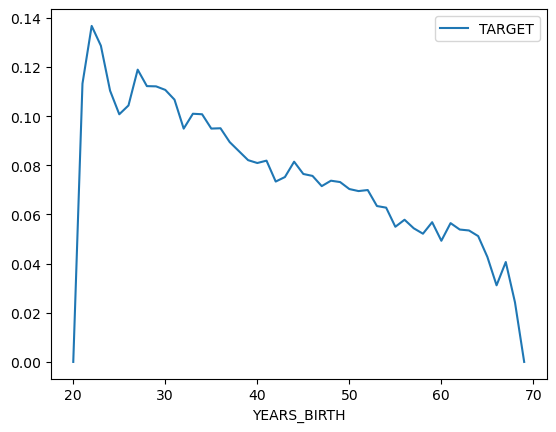

In [21]:
df_app_train["YEARS_BIRTH"] = np.floor(abs(df_app_train["DAYS_BIRTH"])/365)
age = df_app_train.groupby('YEARS_BIRTH')['TARGET'].agg('mean').reset_index()
age.plot(x="YEARS_BIRTH", y="TARGET")

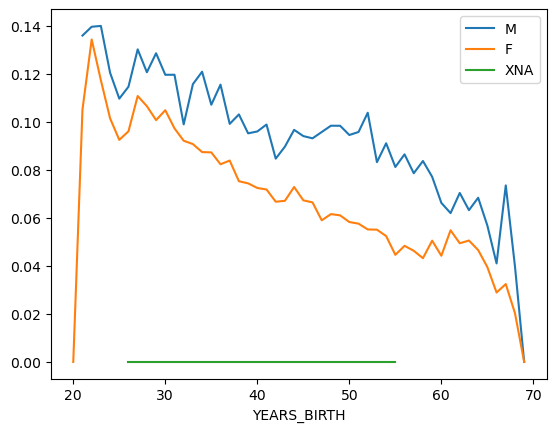

In [22]:
age_ge = df_app_train.groupby(['YEARS_BIRTH', "CODE_GENDER"])['TARGET'].agg('mean').reset_index()
ax = age_ge[age_ge["CODE_GENDER"] == "M"].plot(x="YEARS_BIRTH", y="TARGET", label="M")
age_ge[age_ge["CODE_GENDER"] == "F"].plot(x="YEARS_BIRTH", y="TARGET", label="F", ax=ax)
age_ge[age_ge["CODE_GENDER"] == "XNA"].plot(x="YEARS_BIRTH", y="TARGET", label="XNA", ax=ax)
plt.show()

(array([1.000e+00, 1.254e+03, 2.933e+03, 4.057e+03, 3.905e+03, 4.168e+03,
        4.561e+03, 8.476e+03, 7.975e+03, 7.670e+03, 7.806e+03, 8.377e+03,
        7.911e+03, 7.714e+03, 7.631e+03, 7.804e+03, 8.614e+03, 8.799e+03,
        8.873e+03, 8.770e+03, 8.624e+03, 8.449e+03, 8.216e+03, 8.308e+03,
        7.819e+03, 7.205e+03, 7.293e+03, 7.018e+03, 6.984e+03, 6.627e+03,
        6.482e+03, 6.689e+03, 6.763e+03, 7.457e+03, 7.551e+03, 6.637e+03,
        6.828e+03, 6.768e+03, 6.268e+03, 6.631e+03, 6.227e+03, 5.418e+03,
        5.514e+03, 5.197e+03, 5.117e+03, 3.113e+03, 2.085e+03, 2.042e+03,
        8.660e+02, 1.600e+01]),
 array([20.  , 20.98, 21.96, 22.94, 23.92, 24.9 , 25.88, 26.86, 27.84,
        28.82, 29.8 , 30.78, 31.76, 32.74, 33.72, 34.7 , 35.68, 36.66,
        37.64, 38.62, 39.6 , 40.58, 41.56, 42.54, 43.52, 44.5 , 45.48,
        46.46, 47.44, 48.42, 49.4 , 50.38, 51.36, 52.34, 53.32, 54.3 ,
        55.28, 56.26, 57.24, 58.22, 59.2 , 60.18, 61.16, 62.14, 63.12,
        64.1 , 65.08,

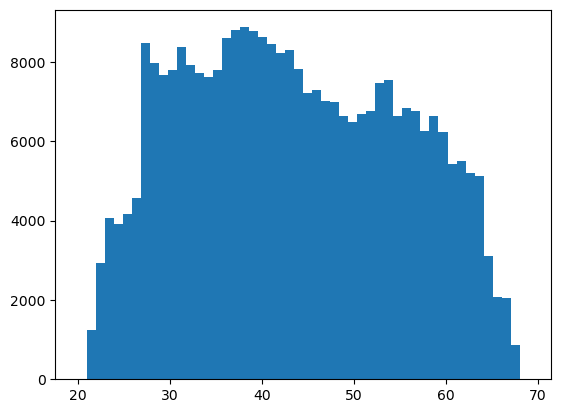

In [23]:
plt.hist(df_app_train["YEARS_BIRTH"], bins=50)